# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 553


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | yangiobod
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | patong
Processing Record 10 of Set 1 | myitkyina
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | cape coast
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | uige
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | shimanovsk
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | utrik
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          525
Lat           525
Lng           525
Max Temp      525
Humidity      525
Cloudiness    525
Wind Speed    525
Country       525
Date          525
dtype: int64

In [5]:
# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,20.93,86,0,0.00,US,1690006686
1,waitangi,-43.9535,-176.5597,12.12,92,100,4.02,NZ,1690006692
2,blackmans bay,-43.0167,147.3167,13.07,84,96,2.55,AU,1690006695
3,yellowknife,62.4560,-114.3525,19.29,48,100,3.09,CA,1690006690
4,yangiobod,41.1192,70.0941,31.45,18,0,2.86,UZ,1690006874
5,grytviken,-54.2811,-36.5092,-2.03,82,78,5.89,GS,1690006695
6,talnakh,69.4865,88.3972,26.23,39,95,3.53,RU,1690006719
7,iskateley,67.6803,53.1512,12.46,87,99,5.93,RU,1690006734
8,patong,7.8961,98.2966,29.08,77,100,7.85,TH,1690006874
9,myitkyina,25.3833,97.4000,34.26,56,91,0.72,MM,1690006874


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

for date in city_data_df["Date"]:
    _ = time.localtime(date)
    city_data_df["Date"] = f"{_.tm_year}-{_.tm_mon}-{_.tm_mday}"

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,20.93,86,0,0.00,US,2023-7-22
1,waitangi,-43.9535,-176.5597,12.12,92,100,4.02,NZ,2023-7-22
2,blackmans bay,-43.0167,147.3167,13.07,84,96,2.55,AU,2023-7-22
3,yellowknife,62.4560,-114.3525,19.29,48,100,3.09,CA,2023-7-22
4,yangiobod,41.1192,70.0941,31.45,18,0,2.86,UZ,2023-7-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# set date variable to use in chart titles below
date = city_data_df.loc[0]["Date"]

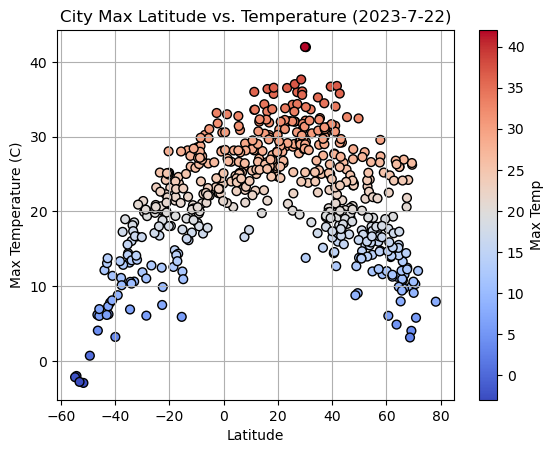

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter("Lat", "Max Temp", c='Max Temp', cmap=plt.colormaps.get_cmap('coolwarm'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

"""
Note that Max Temp will skew northerly or southerly,
depending on time of year

from a design standpoint, this is by far the best of the four plots in this section
I like the colormap for this one
it really helps communicate changes in temperature
the colormap does nothing in the next example
"""

# Show plot
plt.show()

#### Latitude Vs. Humidity

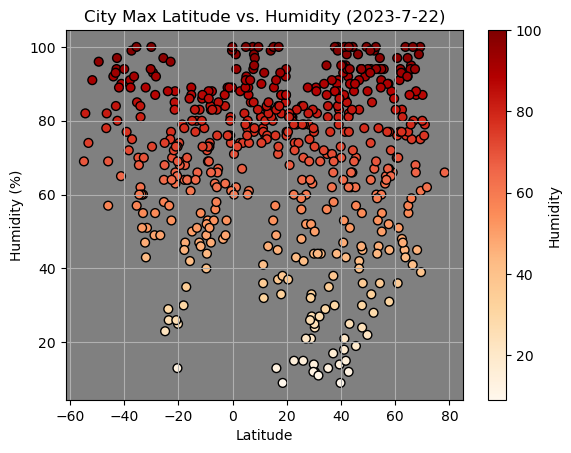

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity', c='Humidity', cmap=plt.colormaps.get_cmap('OrRd'), s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.grid()
# gca - get current axes
plt.gca().set_facecolor('grey')

# Save the figure
plt.savefig("output_data/Fig2.png")

"""
design question
facecolor and colormap look pretty
colormap is excessive, and probably detracts from understanding the chart
it looks like humidity is supposed to mean something, and it really doesn't
"""

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

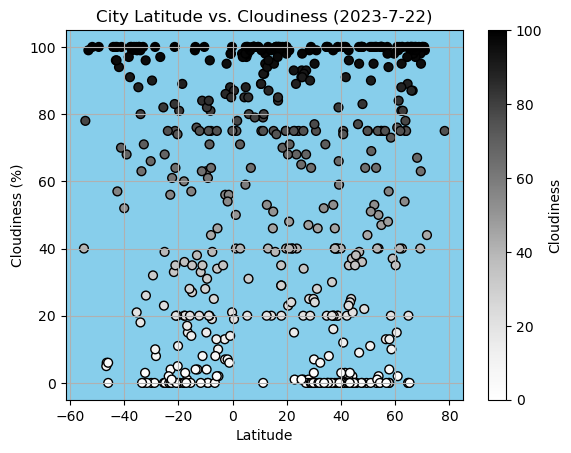

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness', c="Cloudiness", s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.gca().set_facecolor('skyblue')

# Save the figure
plt.savefig("output_data/Fig3.png")

# irrelevant colormap, poorly depicting change in cloud cover
# i wonder if i can replace the data points with emojis, like the sunny / partly cloudy / cloudy symbols
# pretty skyblue background

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

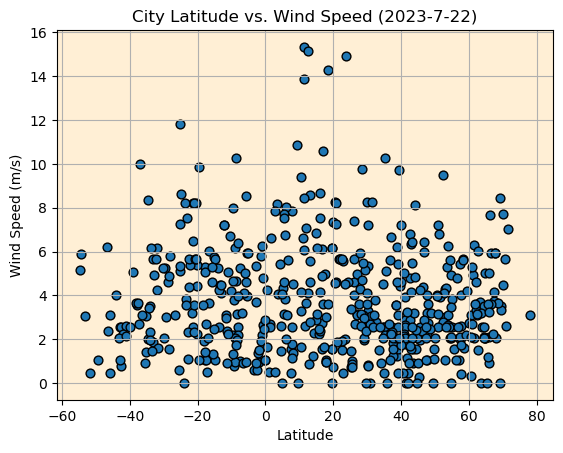

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed', s=40, edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.gca().set_facecolor('papayawhip')

# yeah, now I've just given up on design, going with a light contrast

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def reg(df, x, y):
    # plot scatter
    df.plot.scatter(x, y, s=40, edgecolor="black")
    plt.xlabel('Latitude')
    # design: grid 'too much' for these plots
    # plt.grid()

    # calculate linear regression and get the slope set to the correct y-intercept
    lr = linregress(df[x], df[y])
    tmp = lr.slope * df[x] + lr.intercept

    # print r-value
    print(f"The r-value is: {lr.rvalue}")

    # calculate range to dynamically move annotation
    _x = df[x].min() + (df[x].max() - df[x].min()) * 0.1
    _y = df[y].max() - (df[y].max() - df[y].min()) * 0.1
    
    # plot linear regression and add annotation
    plt.plot(df[x], tmp, color='red')
    _ = f'y = {lr.slope:.2f}x + {lr.intercept:.2f}'
    """
    use plt.legend to dynamically move the annotation in throwaway variable '_'
    but plt.legend kept putting a key, a blue scatterpoint, next to '_'
    so I set up a fake scatterplot, setting all point to zero, then passed it into plt.legend()
    --- this took forever to piece together, because I'm stubborn and wanted that dot to go away ---
    --- there has to be an easier way ---
    !but now i can't get the original x and y ticks to display!:
    _plt = plt.scatter(x, y, label=_, s=0, color='red')
    plt.legend(handles=[_plt], loc='best', labelcolor='red', fontsize=16, handlelength=0)
    """
    plt.legend([_], loc='best', labelcolor='red', fontsize=16, handlelength=0)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,20.93,86,0,0.00,US,2023-7-22
3,yellowknife,62.4560,-114.3525,19.29,48,100,3.09,CA,2023-7-22
4,yangiobod,41.1192,70.0941,31.45,18,0,2.86,UZ,2023-7-22
6,talnakh,69.4865,88.3972,26.23,39,95,3.53,RU,2023-7-22
7,iskateley,67.6803,53.1512,12.46,87,99,5.93,RU,2023-7-22


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df[city_data_df['Lat'] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,12.12,92,100,4.02,NZ,2023-7-22
2,blackmans bay,-43.0167,147.3167,13.07,84,96,2.55,AU,2023-7-22
5,grytviken,-54.2811,-36.5092,-2.03,82,78,5.89,GS,2023-7-22
13,kerikeri,-35.2268,173.9474,14.39,85,99,1.41,NZ,2023-7-22
16,port mathurin,-19.6833,63.4167,23.16,74,81,9.86,MU,2023-7-22


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.60161614440866


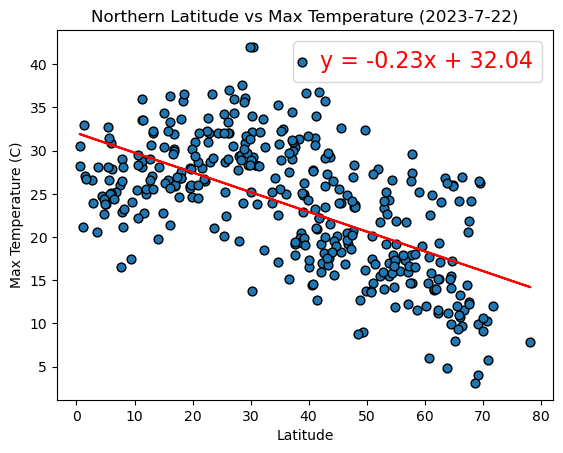

In [16]:
# Linear regression on Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Max Temp')
plt.ylabel("Max Temperature (C)")
plt.title(f"Northern Latitude vs Max Temperature ({date})");
# semicolon supresses text output for objects
# obviating the need for 'plt.show()' as the final line

The r-value is: 0.7928701389602681


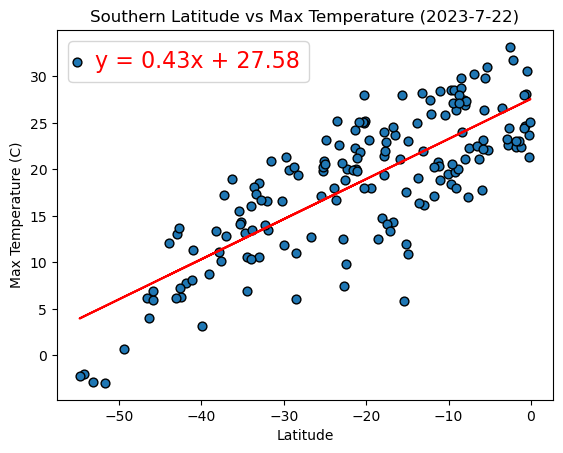

In [17]:
# Linear regression on Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Max Temp')
plt.ylabel("Max Temperature (C)")
plt.title(f"Southern Latitude vs Max Temperature ({date})")
plt.show()

**Discussion about the linear relationship:**

Latitude is significantly correlated with maximum temperature. The r-value, while fluctuating based upon the random sample, has an absolute value above 0.5, often closer to 0.8. The dependent variable, max temperature, decreases as the independent variable, latitude, moves away from the equator.

Note that this means the southern linear regression will have a positive slope and positive r-value (temperature increases as negative latitude approaches zero), while the northern linear regression will have a negative slope and negative r-value (temperature decreases as positive latitude increases from zero). Regardless, the absolute value of the r-value remains consistently strong.

The strength of these values will fluctuate seasonally. So, the northern and southern values for slope and r-value should converge closest around the equinoxes and diverge strongest around the solstices (the north will be generally warmer in June/July, lessening the slope and r-value, while exaggerating it for the southern hemisphere - and vice versa)

Also, note that the southern hemisphere generally has fewer cities (maybe half?) than the northern hemisphere. The smaller sample size could be skewing the results somewhat.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.00544130784335901


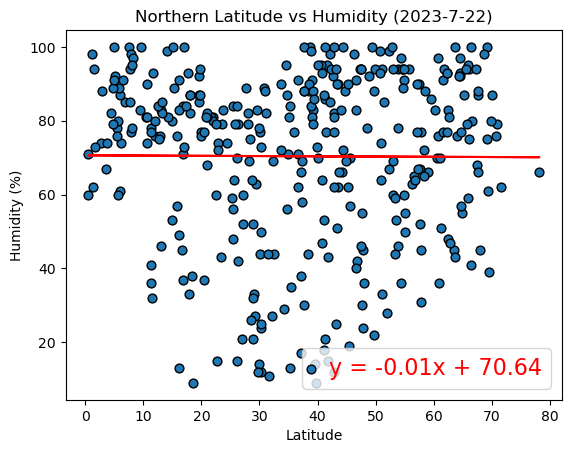

In [18]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Humidity')
plt.ylabel("Humidity (%)")
plt.title(f"Northern Latitude vs Humidity ({date})")
plt.show()

The r-value is: -0.14744226345800693


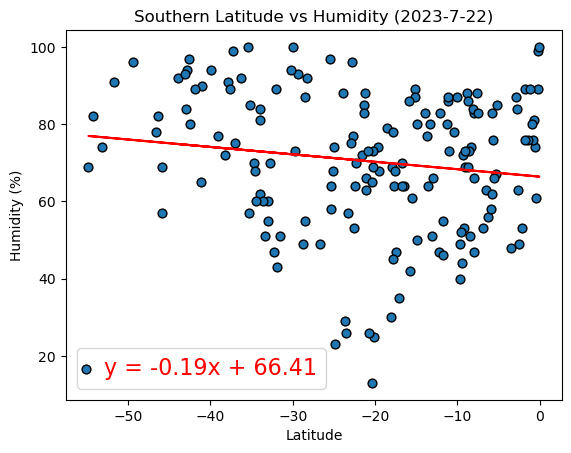

In [19]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Humidity')
plt.ylabel("Humidity (%)")
plt.title(f"Southern Latitude vs Humidity ({date})")
plt.show()

**Discussion about the linear relationship:**

Humidity is weakly correlated with distance from the equator. The r-value huddles close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. Latitude has little bearing on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07692019414488105


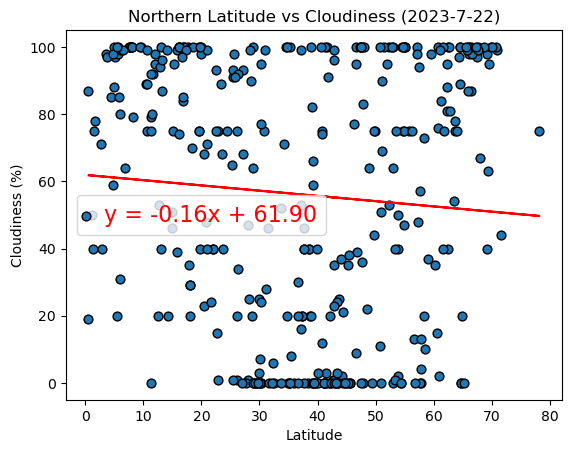

In [20]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Latitude vs Cloudiness ({date})")
plt.show()

The r-value is: -0.23055375345818338


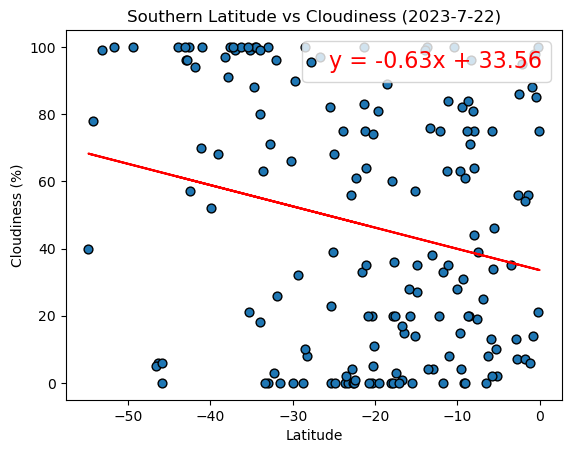

In [21]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Cloudiness')
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Latitude vs Cloudiness ({date})")
plt.show()

**Discussion about the linear relationship:**

Cloudiness is weakly correlated with distance from the equator. The r-value stays close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. The slope of the linear regresssion and the r-value are close to zero. Latitude has little bearing on cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1721879898593962


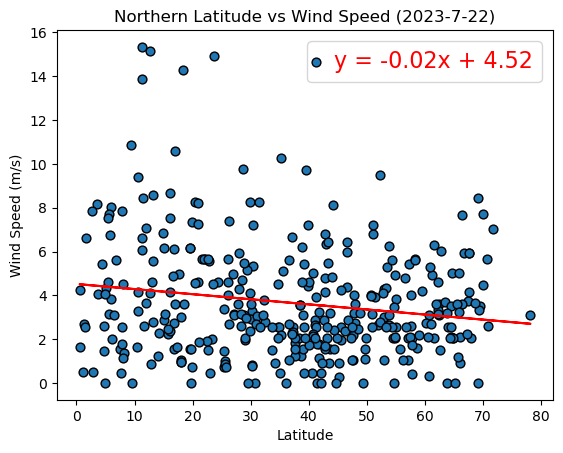

In [22]:
# Northern Hemisphere
reg(northern_hemi_df, 'Lat', 'Wind Speed')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Northern Latitude vs Wind Speed ({date})")
plt.show()

The r-value is: 0.002880695420719649


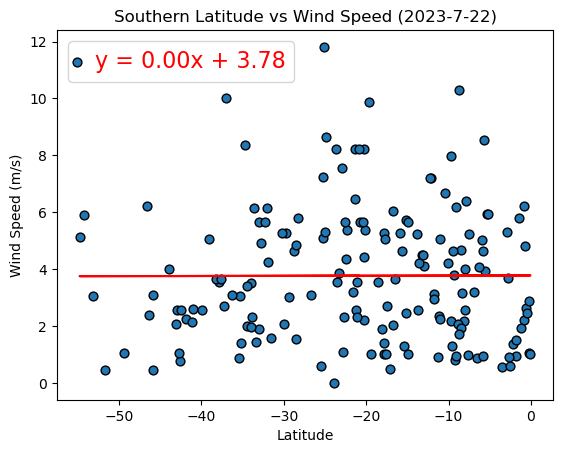

In [23]:
# Southern Hemisphere
reg(southern_hemi_df, 'Lat', 'Wind Speed')
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Southern Latitude vs Wind Speed ({date})")
plt.show()

**Discussion about the linear relationship:** 

Wind speed is weakly correlated with distance from the equator. The r-value remains close to zero, meaning that the linear regression line poorly matches the spread of data points, indicating little relationship between the two variables. The slope of the linear regresssion and the r-value are close to zero. Latitude has little bearing on wind speed.